<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/US_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: 전체 이미지 대비를 높여 작은 병변이나 경계선을 강조**

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
# 원본 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/Ultrasound (US)/US 이미지/benign (107).png'  # 이미지 경로 설정
us_image = io.imread(image_path, as_gray=True)

In [3]:
#  원본 이미지 데이터 확인
print(f"Original us_image - Min Value: {us_image.min()}, Max Value: {us_image.max()}")
print(f"Original us_image - Data Type: {us_image.dtype}")
print(f"Original us_image - Shape: {us_image.shape}")

Original us_image - Min Value: 0.0, Max Value: 1.0
Original us_image - Data Type: float64
Original us_image - Shape: (616, 759)


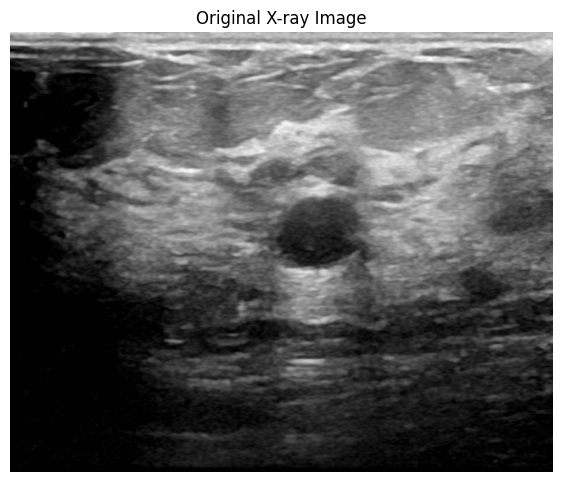

In [5]:
# 원본 이미지 시각화

plt.figure(figsize=(7, 7))
plt.imshow(us_image, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')
plt.show()

In [6]:
# 2. uint8 형식으로 변환 (히스토그램 평활화를 적용하기 위해)
us_image_uint8 = (us_image * 255).astype('uint8')

In [7]:
print(f"Original us_image_uint8 - Min Value: {us_image_uint8.min()}, Max Value: {us_image_uint8.max()}")
print(f"Original us_image_uint8 - Data Type: {us_image_uint8.dtype}")
print(f"Original us_image_uint8 - Shape: {us_image_uint8.shape}")

Original us_image_uint8 - Min Value: 0, Max Value: 255
Original us_image_uint8 - Data Type: uint8
Original us_image_uint8 - Shape: (616, 759)


In [8]:
# 히스토그램 평활화 적용
equalized_image = cv2.equalizeHist(us_image_uint8)

**전처리 전후 이미지 비교**

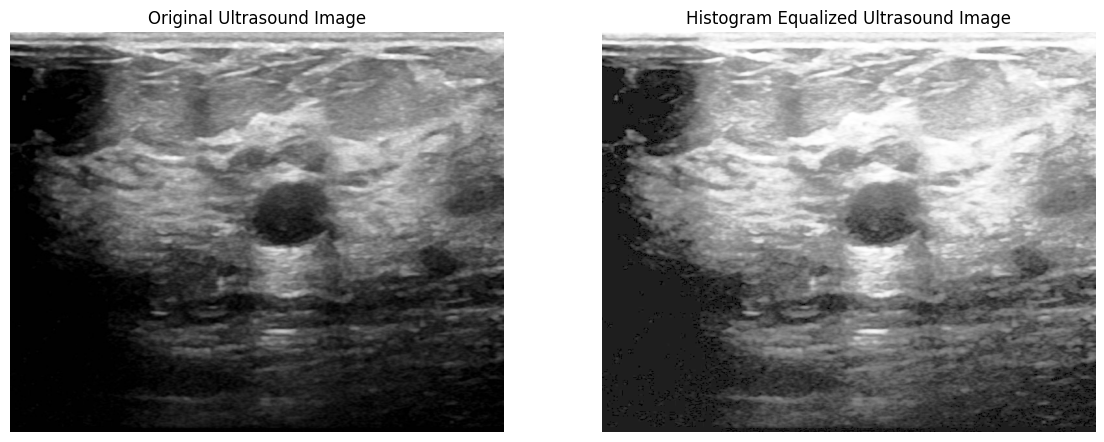

In [9]:
plt.figure(figsize=(14, 7))

# 원본 초음파 이미지
plt.subplot(1, 2, 1)
plt.imshow(us_image, cmap='gray')
plt.title("Original Ultrasound Image")
plt.axis('off')

# 히스토그램 평활화 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Ultrasound Image")
plt.axis('off')

plt.show()

**히스토그램 비교**

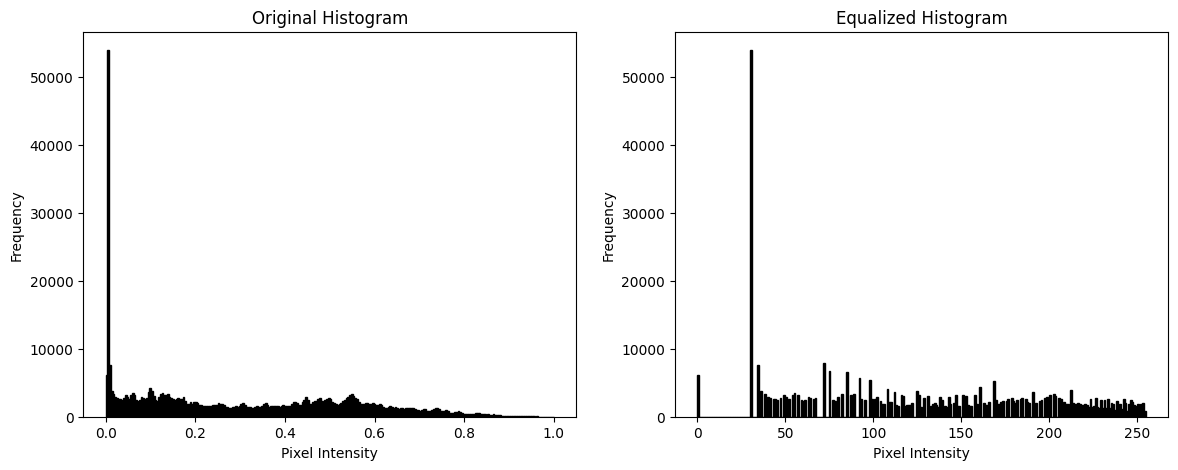

In [11]:
plt.figure(figsize=(14, 5))

# 원본 히스토그램
plt.subplot(1, 2, 1)
plt.hist(us_image.ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized 히스토그램
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 255), fc='black', ec='black')
plt.title("Equalized Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()